<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/%ED%94%BC%EB%A7%88%20%EC%9D%B8%EB%94%94%EC%96%B8%20%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 피마 인디언은 1950년대까지만 해도 비만인이 1명도 없는 부족이었다.

* 하지만 현재 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있다고 한다.

* 피마 인디언을 대상으로 당뇨병 여부를 측정한 데이터 분석을 통해 예측(분류)해 보자.

# 판다스를 활용한 데이터 조사

In [33]:
# 필요 라이브러리 가동
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib 시각화 보조 도구 기능

# 데이터셋 준비
!git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋 로드
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

fatal: destination path 'data' already exists and is not an empty directory.


In [34]:
# 데이터셋 내용 확인 (5개 샘플)
df.head()

# 파이썬의 인덱스 번호 개념으로 인해 첫 번째 행은 0으로 표시됨
# 'diabetes' 열은 0 또는 1의 값으로 구성된 클래스임 (내가 예측해야 할 정답 데이터 - 이진 분류)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# 각각의 일반인과 당뇨 환자 수 출력
df["diabetes"].value_counts()

# df["칼럼명"]은 데이터 프레임의 특정 칼럼을 불러오겠다는 것
# value_counts() 함수는 해당 컬럼의 값이 몇 개씩 있는지 알려 줌

,count
diabetes,
0,500
1,268


In [36]:
# 속성(특성)별 구체적 특징 확인
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
# 각 속성의 상관관계 확인
df.corr()

# 1에 가까울수록 양의 상관관계(두 변수가 같은 방향으로 움직이려는 경향 강함)
# -1에 가까울수록 음의 상관관계 (두 변수가 반대 방향으로 움직이려는 경향 강함)
# 0에 가까울수록 상관관계가 약함

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


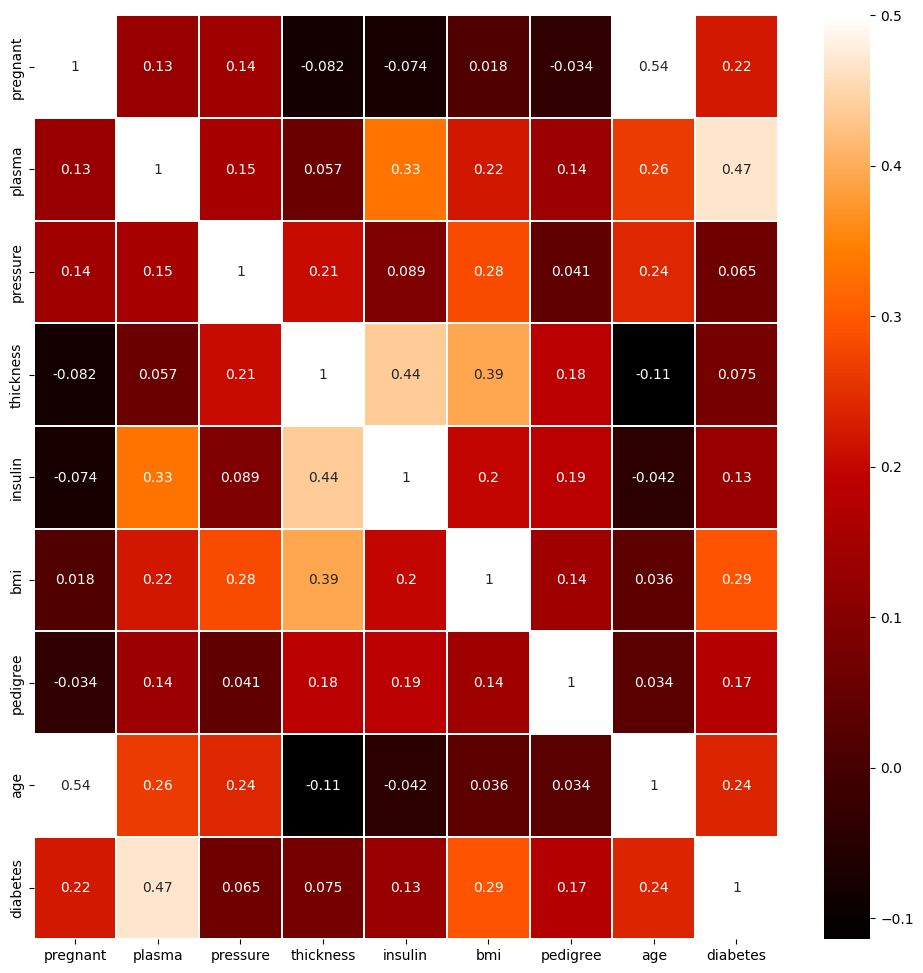

In [38]:
# 상관관계 시각화

# 그래프 색상과 크기 지정
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

# 히트맵 그래프 속성 사용
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot=True)
plt.show()

# vmax는 색상의 밝기를 조절하는 매개변수임
# cmap은 미리 정해진 맷플롯립의 색상 설정 값을 불러옴
# diabets 속성과 plasma(공복 혈당 농도)와 BMI(체질량 지수)가 상관관계가 높음

# 중요 데이터 추출하기

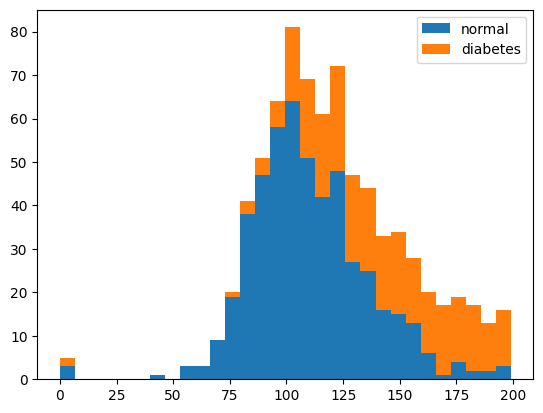

In [39]:
# plasma를 기준으로 정상과 당뇨 여부가 어떻게 분포되는지 확인
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

# 가져올 칼럼(속성)을 hist() 함수 안에 x축으로 지정 (+ diabetes 값이 0과 1인 것을 구분)
# bins 매개변수는 x축을 몇 개의 막대로 쪼개어 시각화할 것인지 정함
# barstacked는 여러 데이터가 쌓여있는 형태의 막대바를 생성함
# 불러올 데이터의 라벨을 각각 normal(정상)과 diabetes(당뇨)로 정함
# plasma 수치가 높아질수록 당뇨인 경우가 많음을 알 수 있음

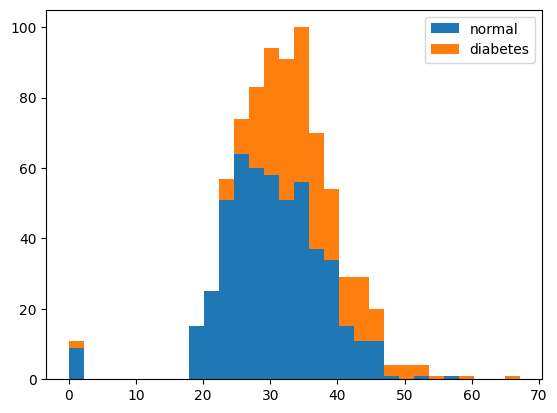

In [40]:
# BMI를 기준으로 동일한 과정 수행
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal','diabetes'])
plt.legend()

# 마찬가지로 BMI가 높아질 경우 당뇨 발병률도 함께 증가함을 알 수 있음

In [41]:
'''
지금까지 이렇게 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정 중 하나이다!
이 밖에도 데이터에 빠진 값(결측치)이 있다면 평균이나 중앙값으로 대치하거나,
흐름에서 크게 벗어나는 이상치를 제거하는 과정 등이 데이터 전처리 과정에 포함된다.
특히 SVM이나 랜덤 포레스트처럼 일반적인 머신 러닝에서는 데이터 전처리 과정이 성능 향상에 중요 역할을 한다.
'''

'\n지금까지 이렇게 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정 중 하나이다!\n이 밖에도 데이터에 빠진 값(결측치)이 있다면 평균이나 중앙값으로 대치하거나,\n흐름에서 크게 벗어나는 이상치를 제거하는 과정 등이 데이터 전처리 과정에 포함된다.\n특히 SVM이나 랜덤 포레스트처럼 일반적인 머신 러닝에서는 데이터 전처리 과정이 성능 향상에 중요 역할을 한다.\n'

# 피마 인디언의 당뇨병 예측(분류) 실행

In [42]:
# 필요 라이브러리 가동
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# X(sample)와 y(target)를 각각 저장
X = df.iloc[:,0:8] # 세부 정보를 X로 지정
y = df.iloc[:,8] # 당뇨병 여부를 y로 지정

# 판다스의 iloc[] 함수는 대괄호 안에 정한 범위만큼 가져와 저장하게 함
# df.iloc[행, 열]의 형태이며 슬라이싱으로 가져옴 (인덱스 순서 개념 적용)

In [43]:
# 모델 생성 및 확인
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1')) # 은닉층의 12개 노드로 입력 노드 8개가 이동
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

model.summary()

# Output Shape은 각 층에 몇 개의 출력이 발생하는지 나타냄 (행(샘플)의 수, 열(속성)의 수)
# 행의 수는 batch_size에 정한 만큼 입력되므로 모델에서는 이를 세지 않음
# Param 부분은 파라미터 수, 즉 총 가중치와 바이어스의 수의 합을 나타냄
# Dense_1) 8(입력 노드의 수) * 12(12개 노드의 각 기울기) + 12(절편 값) = 108
# Dense_2) 12 * 8 + 8 = 104
# Dense_3) 8 * 1 + 1 = 9
# Trainable params는 학습을 진행하며 업데이트 된 파라미터들이고,
# Non-trainable params는 업데이트 되지 않은 파라미터 수를 나타냄

# '혼공머신'에서 잘 이해되지 않았던 Param 값 계산 원리를 이제는 알 것 같다.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
'''
은닉층의 개수는 왜 두개로 했는가? 그리고 노드의 수는 왜 각각 12개와 8개로 지정했나?
이에 대한 질문의 정답은 없다.
경험치가 쌓임에 따라 스스로가 직관적으로 파악해 설정해야 하는 것이다.
직접 노드 수와 은닉층의 개수를 바꿔 보면서 실력을 쌓도록 하자.
'''

'\n은닉층의 개수는 왜 두개로 했는가? 그리고 노드의 수는 왜 각각 12개와 8개로 지정했나?\n이에 대한 질문의 정답은 없다.\n경험치가 쌓임에 따라 스스로가 직관적으로 파악해 설정해야 하는 것이다.\n직접 노드 수와 은닉층의 개수를 바꿔 보면서 실력을 쌓도록 하자.\n'

In [45]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 이진 분류 문제이므로 binary_crossentropy 사용

# 모델 훈련 실행
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5833 - loss: 5.6096
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5723 - loss: 1.0636
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6504 - loss: 0.8238
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6488 - loss: 0.7835
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.6548
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6320 - loss: 0.7110
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6265 - loss: 0.7758
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - loss: 0.6870
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.6109
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6905 - loss: 0.6473
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6728 - loss: 0.6720
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

# +**로지스틱 회귀를 통한 정확도 비교**

In [46]:
# 필요 라이브러리 가동
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
# 데이터 준비
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [48]:
# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80%는 훈련세트, 20%는 테스트 세트
# 이전에 input과 target을 각각 X와 Y로 지정한 바 있음

In [49]:
# 모델 생성 및 훈련
model2 = LogisticRegression()

model2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
'''
한 가지 문제가 있다.
로지스틱 회귀 모델의 성능을 평가(ROC 곡선 계산)할 때,
실제 타겟값(y_test)과 모델의 예측값(y_pred)의 데이터 유형이 일치하지 않아 오류가 발생했다.
앞서 딥러닝 모델의 예측값 데이터는 연속적인 데이터, 즉 "continuous targets"이기 때문이다.

따라서 이를 해결하기 위해 임계값을 적용하여 예측값을 이진 클래스 레이블로 변환하고자 한다.
'''

'\n한 가지 문제가 있다.\n로지스틱 회귀 모델의 성능을 평가할 때,\n실제 타겟값(y_test)과 모델의 예측값(y_pred)의 데이터 유형이 일치하지 않아 오류가 발생했다.\n앞서 딥러닝 모델의 예측값 데이터는 연속적인 데이터, 즉 "continuous targets"이기 때문이다.\n\n따라서 이를 해결하기 위해 임계값을 적용하여 예측값을 이진 클래스 레이블로 변환하고자 한다.\n'

In [54]:
# 모델 정확도 평가

# predict() 메서드를 사용하여 예측 확률을 반환
y_pred_probs = model.predict(X_test)

# 예측 확률에 임계값을 적용하여 클래스 레이블로 변환
y_pred = (y_pred_probs > 0.5).astype(int)

# 분류 지표(정확도) 계산
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 약 0.7의 정확도로 딥러닝 모델보다 낮은 값이 출력되었음

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.6948051948051948


# **두 모델 간 정확도 차이 시각화**

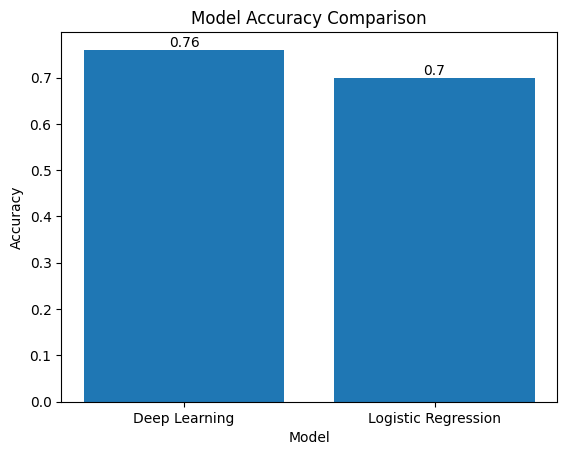

In [56]:
# 두 모델의 정확도
deep_learning_accuracy = 0.76
logistic_regression_accuracy = 0.7

# 모델 이름
model_names = ['Deep Learning', 'Logistic Regression']

# 정확도 값
accuracies = [deep_learning_accuracy, logistic_regression_accuracy]

# 그래프 생성
plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# 정확도 값 표시
for i, v in enumerate(accuracies):
    plt.text(i, v, str(v), ha='center', va='bottom')

# 그래프 출력
plt.show()

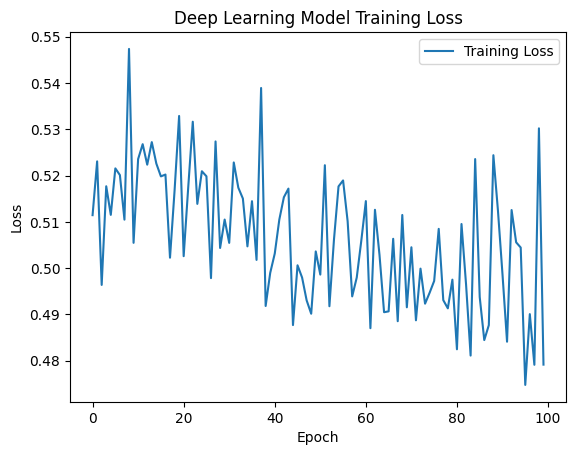

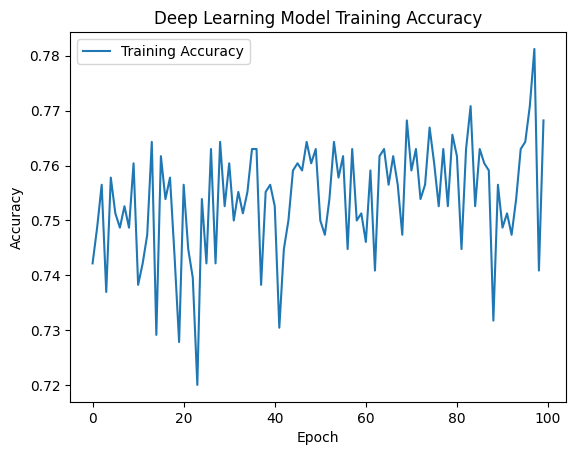

In [62]:
# 손실 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Deep Learning Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Deep Learning Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


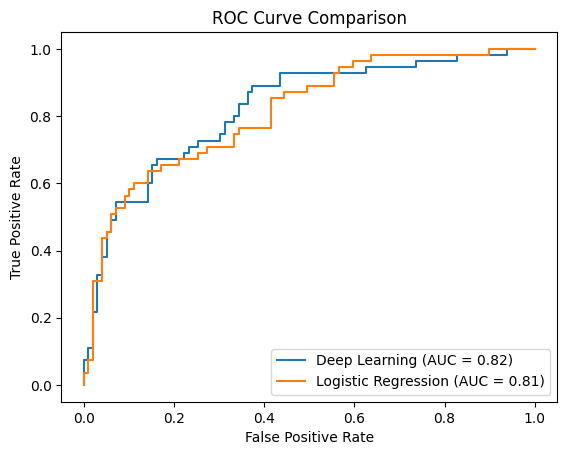

In [63]:
from sklearn.metrics import roc_curve, auc

# 딥러닝 모델의 예측 확률
deep_learning_probs = model.predict(X_test)

# 로지스틱 회귀 모델의 예측 확률
logistic_regression_probs = model2.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
deep_learning_fpr, deep_learning_tpr, _ = roc_curve(y_test, deep_learning_probs)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probs)

# AUC (Area Under the Curve) 계산
deep_learning_auc = auc(deep_learning_fpr, deep_learning_tpr)
logistic_regression_auc = auc(logistic_regression_fpr, logistic_regression_tpr)

# ROC 곡선 그리기
plt.plot(deep_learning_fpr, deep_learning_tpr, label='Deep Learning (AUC = %0.2f)' % deep_learning_auc)
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic Regression (AUC = %0.2f)' % logistic_regression_auc)

# 그래프 설정
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [64]:
'''
두 모델의 성능 비교 결과 딥러닝 모델이 조금 더 우위에 있다는 결과를 얻었다.
일반적으로 ROC 곡선이 좌상단 모서리에 가까울수록, 그리고 AUC 값이 클수록
모델의 성능이 좋다고 판단할 수 있다고 한다.

하지만 훈련 손실 및 정확도 그래프, ROC 곡선 그래프를 보면 알 수 있듯이
매끄럽게 이어지는 그래프가 아닌 계단식으로 흐름이 끊어지는 형태를 나타낸다.
이는 훈련에 사용한 피마 인디언 데이터셋의 크기가 작기 때문일 것이다.
데이터셋의 크기가 클수록 ROC 곡선을 더 부드럽게 이어지는 형태를 보인다고 한다.

또한 나의 몇 가지 실수를 정리하자면,
1. 딥러닝 모델의 예측값을 ROC 곡선 계산에 사용했다. --> 이를 위해서는 임계값을 적용한 예측값을 사용할 것
2. ROC 곡선에 나타나는 AUC 값은 "accuracy"가 아니다. --> "Area Under Curve"
3. 모델 간의 유의미한 성능 비교를 위해서는 훈련 데이터셋의 크기가 어느 정도 커야 한다.
4. ROC 곡선의 깊은 이해를 위해 혼동 행렬(confusion matrix) 개념을 꼭 공부할 필요가 있다.

지금까지 피마 인디언 데이터셋의 이진 분류 문제를
로지스틱 회귀 모델로도 해결하면 흥미롭지 않을까라는
호기심으로 시작해 GPT의 도움을 받아 성능 비교 아닌 비교(?)를 해보았다.
데이터의 유의미한 분석을 위해 더욱 공부가 필요해 보인다.
'''

'\n두 모델의 성능 비교 결과 딥러닝 모델이 조금 더 우위에 있다는 결과를 얻었다.\n일반적으로 ROC 곡선이 좌상단 모서리에 가까울수록, 그리고 AUC 값이 클수록\n모델의 성능이 좋다고 판단할 수 있다고 한다.\n\n하지만 훈련 손실 및 정확도 그래프, ROC 곡선 그래프를 보면 알 수 있듯이 \n매끄럽게 이어지는 그래프가 아닌 계단식으로 흐름이 끊어지는 형태를 나타낸다.\n이는 훈련에 사용한 피마 인디언 데이터셋의 크기가 작기 때문일 것이다.\n데이터셋의 크기가 클수록 ROC 곡선을 더 부드럽게 이어지는 형태를 보인다고 한다.\n\n또한 나의 몇 가지 실수를 정리하자면,\n1. 딥러닝 모델의 예측값을 ROC 곡선 계산에 사용했다. --> 이를 위해서는 임계값을 적용한 예측값을 사용할 것\n2. ROC 곡선에 나타나는 AUC 값은 "accuracy"가 아니다. --> "Area Under Curve"\n3. 모델 간의 유의미한 성능 비교를 위해서는 훈련 데이터셋의 크기가 어느 정도 커야 한다.\n4. ROC 곡선의 깊은 이해를 위해 혼동 행렬(confusion matrix) 개념을 꼭 공부할 필요가 있다.\n\n지금까지 피마 인디언 데이터셋의 이진 분류 문제를 \n로지스틱 회귀 모델로도 해결하면 흥미롭지 않을까라는\n호기심으로 시작해 GPT의 도움을 받아 성능 비교 아닌 비교(?)를 해보았다.\n데이터의 유의미한 분석을 위해 더욱 공부가 필요해 보인다.\n'